In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [3]:
samples_per_class = 5000
no_of_classes = 2
directory = "/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Binary Classification/Signal_HIDDEN_in_strain_data/ALIGO_noise/Test 2/data/"

In [4]:
noise_df = pd.read_csv(directory + "Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)
noise = np.repeat(noise, 5000, 0)


data_BBH_df = pd.read_csv(directory + "Final_BBH_Merged_Noise_Signal.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)
data_BBH = np.repeat(data_BBH, 5000, 0)

In [6]:
X = np.concatenate((noise, data_BBH), axis=0)
print(X.shape)

(10000, 16384)


In [7]:
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
X *= 1e19
print(X)

[[ 14.65145352 -23.60718627  -0.8978519  ...   9.59424233  -8.63692991
    9.00148536]
 [ 14.65145352 -23.60718627  -0.8978519  ...   9.59424233  -8.63692991
    9.00148536]
 [ 14.65145352 -23.60718627  -0.8978519  ...   9.59424233  -8.63692991
    9.00148536]
 ...
 [ -1.26990972   3.80354169  -8.73270779 ...   2.60589577  -3.11418247
   10.1532447 ]
 [ -1.26990972   3.80354169  -8.73270779 ...   2.60589577  -3.11418247
   10.1532447 ]
 [ -1.26990972   3.80354169  -8.73270779 ...   2.60589577  -3.11418247
   10.1532447 ]]


In [9]:
X = np.expand_dims(X, axis=-1)
print(X.shape)

(10000, 16384, 1)


In [10]:
X_train, X1, y_train, y1 = train_test_split(X, y, test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X1, y1, test_size=0.5)

In [11]:
print(X_train.shape, y_train.shape)

(8000, 16384, 1) (8000, 2)


In [12]:
model = Sequential()

model.add(Conv1D(16, 16, input_shape = (16384,1)))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(32, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(64, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(128, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data = (X_val, y_val))

Epoch 1/5
63/63 [==============================] - 18s 116ms/step - loss: 0.2482 - accuracy: 0.9920 - val_loss: 2.5740e-06 - val_accuracy: 1.0000
Epoch 2/5
63/63 [==============================] - 7s 108ms/step - loss: 1.4647e-06 - accuracy: 1.0000 - val_loss: 9.0627e-07 - val_accuracy: 1.0000
Epoch 3/5
63/63 [==============================] - 7s 105ms/step - loss: 6.7200e-07 - accuracy: 1.0000 - val_loss: 4.8592e-07 - val_accuracy: 1.0000
Epoch 4/5
63/63 [==============================] - 7s 105ms/step - loss: 3.8114e-07 - accuracy: 1.0000 - val_loss: 2.9413e-07 - val_accuracy: 1.0000
Epoch 5/5
63/63 [==============================] - 7s 105ms/step - loss: 2.4105e-07 - accuracy: 1.0000 - val_loss: 1.9568e-07 - val_accuracy: 1.0000


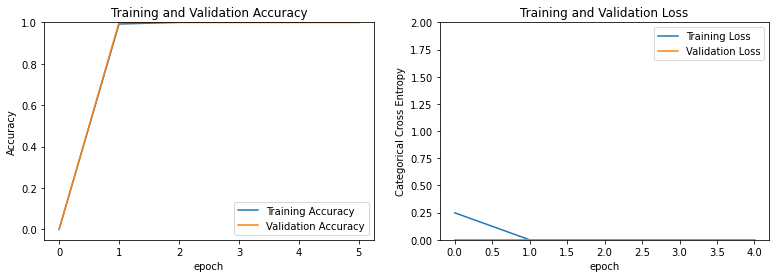

In [14]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig(directory[:-5]+"screenshots/graph_1.png")
plt.show()

Precision: 1.000
Recall: 1.000
F1-Score: 1.000


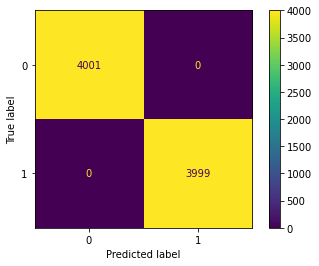

In [15]:
# Training Data

pred = model.predict(X_train)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_train, axis = 1)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.savefig(directory[:-5]+"screenshots/train_cm_1.png")
plt.show()

Precision: 1.000
Recall: 1.000
F1-Score: 1.000


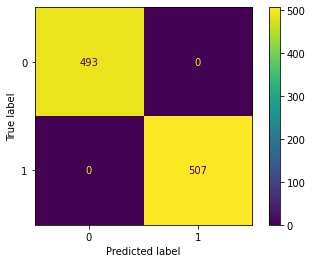

In [16]:
# Validation Data

pred = model.predict(X_val)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.savefig(directory[:-5]+"screenshots/val_cm_1.png")
plt.show()

Precision: 1.000
Recall: 1.000
F1-Score: 1.000


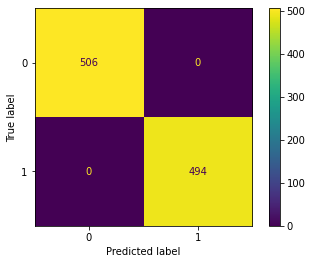

In [17]:
# Testing Data

pred = model.predict(X_test)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.savefig(directory[:-5]+"screenshots/test_cm_1.png")
plt.show()

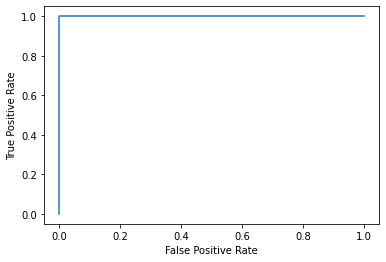

In [18]:
# ROC for validation data

pred = model.predict(X_val)
y_true = np.argmax(y_val, axis = 1)
pos_probs = pred[:,1]
fpr, tpr, _ = roc_curve(y_true, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/val_roc_1.png")
plt.show()

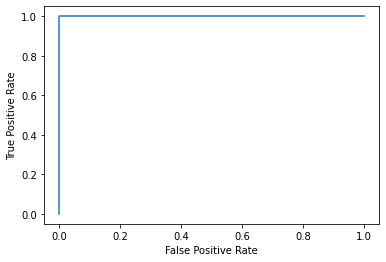

In [19]:
# ROC for testing data

pred = model.predict(X_test)
y_true = np.argmax(y_test, axis = 1)
pos_probs = pred[:,1]
fpr, tpr, _ = roc_curve(y_true, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/test_roc_1.png")
plt.show()

In [21]:
# model.save(directory + "model_trial_1.h5")